In [3]:
from collections import Counter

def K(x, y, z):
    return max(x-1, 0), max(y-1, 0), min(z+2, n)

def L(x, y, z):
    return min(x+2, n), max(y-1, 0), max(z-1, 0)

def M(x, y, z):
    return max(x-1, 0), min(y+2, n), max(z-1, 0)

def T(x, y, z):
    return x, y, z

def calc_probs(x, y, z):
    probs = Counter()
    
    funcs = [T, K, L, M]
    weights = [(x**2 - x + y**2 - y + z**2 - z), 2*x*y, 2*y*z, 2*x*z]
    
    for i in range(len(funcs)):
        prob = weights[i] / (n * (n-1))
        if prob != 0:
            probs[funcs[i]] = prob
    
    return probs

def update_parts(x, y, z, collision_func):
    return collision_func(x, y, z)

def main():
    global n
    x = int(input("Enter the initial number of A particles: "))
    y = int(input("Enter the initial number of B particles: "))
    z = int(input("Enter the initial number of C particles: "))
    n = x + y + z  # Total number of particles
    n_collisions = int(input("Enter the number of collisions: "))
    
    current_probs = Counter({(x, y, z): 1.0})
    
    for _ in range(n_collisions):
        new_probs = Counter()
        for particles, probability in current_probs.items():
            x, y, z = particles
            if x == 0 and y == 0:
                probs = calc_probs(x, y, z)
                new_parts = update_parts(x, y, z, T)
                new_parts = tuple(max(min(val, n), 0) for val in new_parts)
                new_probs[new_parts] += probability
            else:
                probs = calc_probs(x, y, z)
                for func, prob in probs.items():
                    new_parts = update_parts(x, y, z, func)
                    new_parts = tuple(max(min(val, n), 0) for val in new_parts)
                    new_probs[new_parts] += probability * prob
        current_probs = new_probs
    
    tot_posb_outcomes = sum(current_probs.values())
    
    print("Possible splits of A, B, and C particles and their probabilities:")
    for particles, probability in current_probs.items():
        prob = probability / tot_posb_outcomes
        if prob != 0:
            print(f"Splitted into {particles} with probability {prob:.10f}")

if __name__ == "__main__":
    main()


Enter the initial number of A particles: 2
Enter the initial number of B particles: 2
Enter the initial number of C particles: 2
Enter the number of collisions: 5
Possible splits of A, B, and C particles and their probabilities:
Splitted into (2, 2, 2) with probability 0.2358400000
Splitted into (1, 1, 4) with probability 0.1224533333
Splitted into (4, 1, 1) with probability 0.1224533333
Splitted into (1, 4, 1) with probability 0.1224533333
Splitted into (0, 0, 6) with probability 0.0401066667
Splitted into (3, 0, 3) with probability 0.0921600000
Splitted into (0, 3, 3) with probability 0.0921600000
Splitted into (6, 0, 0) with probability 0.0401066667
Splitted into (3, 3, 0) with probability 0.0921600000
Splitted into (0, 6, 0) with probability 0.0401066667


In [4]:
from collections import Counter

def K(x, y, z):
    return max(x-1, 0), max(y-1, 0), min(z+2, n)

def L(x, y, z):
    return min(x+2, n), max(y-1, 0), max(z-1, 0)

def M(x, y, z):
    return max(x-1, 0), min(y+2, n), max(z-1, 0)

def T(x, y, z):
    return x, y, z

def calc_probs(x, y, z):
    probs = Counter()
    
    funcs = [T, K, L, M]
    weights = [(x**2 - x + y**2 - y + z**2 - z), 2*x*y, 2*y*z, 2*x*z]
    
    for i in range(len(funcs)):
        prob = weights[i] / (n * (n-1))
        if prob != 0:
            probs[funcs[i]] = prob
    
    return probs

def update_parts(x, y, z, collision_func):
    return collision_func(x, y, z)

def sim_coll(x, y, z, n_colls):
    current_probs = Counter({(x, y, z): 1.0})
    expect_coll = 0
    
    for _ in range(n_colls):
        new_probs = Counter()
        for particles, probability in current_probs.items():
            x, y, z = particles
            if x == 0 and y == 0:
                probs = calc_probs(x, y, z)
                new_parts = update_parts(x, y, z, T)
                new_parts = tuple(max(min(val, n), 0) for val in new_parts)
                new_probs[new_parts] += probability
            else:
                probs = calc_probs(x, y, z)
                for func, prob in probs.items():
                    new_parts = update_parts(x, y, z, func)
                    new_parts = tuple(max(min(val, n), 0) for val in new_parts)
                    new_probs[new_parts] += probability * prob
        current_probs = new_probs
        expect_coll += 1
    
    tot_poss_outcomes = sum(current_probs.values())
    
    most_likely_outcome = max(current_probs, key=current_probs.get)
    prob_of_most_likely = current_probs[most_likely_outcome] / tot_poss_outcomes
    
    return most_likely_outcome, prob_of_most_likely

def main():
    global n
    x = int(input("Enter the initial number of A particles: "))
    y = int(input("Enter the initial number of B particles: "))
    z = int(input("Enter the initial number of C particles: "))
    n = x + y + z  # Total number of particles
    
    while True:
        n_colls = int(input("Enter the number of collisions to simulate (0 to exit): "))
        if n_colls == 0:
            break
        outcome, probability = sim_coll(x, y, z, n_colls)
        print(f"\nMost likely outcome after {n_colls} collisions:")
        print(f"Splitted into {outcome} with probability {probability:.5f}")

if __name__ == "__main__":
    main()


Enter the initial number of A particles: 2
Enter the initial number of B particles: 2
Enter the initial number of C particles: 2
Enter the number of collisions to simulate (0 to exit): 5

Most likely outcome after 5 collisions:
Splitted into (2, 2, 2) with probability 0.23584
Enter the number of collisions to simulate (0 to exit): 0


In [5]:
from collections import Counter

def K(x, y, z):
    return max(x - 1, 0), max(y - 1, 0), min(z + 2, n)

def L(x, y, z):
    return min(x + 2, n), max(y - 1, 0), max(z - 1, 0)

def M(x, y, z):
    return max(x - 1, 0), min(y + 2, n), max(z - 1, 0)

def T(x, y, z):
    return x, y, z

def calc_probs(x, y, z):
    probs = Counter()
    
    funcs = [T, K, L, M]
    weights = [(x**2 - x + y**2 - y + z**2 - z), 2*x*y, 2*y*z, 2*x*z]
    
    for i in range(len(funcs)):
        prob = weights[i] / (n * (n-1))
        if prob != 0:
            probs[funcs[i]] = prob
    
    return probs

def update_parts(x, y, z, collision_func):
    return collision_func(x, y, z)

def sim_colls(start_x, start_y, start_z, n_collisions):
    current_probs = Counter({(start_x, start_y, start_z): 1.0})
    
    for _ in range(n_collisions):
        new_probs = Counter()
        for particles, probability in current_probs.items():
            x, y, z = particles
            if x == 0 and y == 0:
                probs = calc_probs(x, y, z)
                new_parts = update_parts(x, y, z, T)
                new_parts = tuple(max(min(val, n), 0) for val in new_parts)
                new_probs[new_parts] += probability
            else:
                probs = calc_probs(x, y, z)
                for func, prob in probs.items():
                    new_parts = update_parts(x, y, z, func)
                    new_parts = tuple(max(min(val, n), 0) for val in new_parts)
                    new_probs[new_parts] += probability * prob
        current_probs = new_probs
    
    return current_probs

def main():
    global n
    x = int(input("Enter the initial number of A particles: "))
    y = int(input("Enter the initial number of B particles: "))
    z = int(input("Enter the initial number of C particles: "))
    n = x + y + z  # Total number of particles
    
    print("Number of collisions\tProbability of (n, 0, 0)")
    print("----------------------------------------------")
    for n_collisions in range(3, 500):
        probs = sim_colls(x, y, z, n_collisions)
        prob_n_0_0 = probs.get((n, 0, 0), 0)
        print(f"{n_collisions}\t\t\t{prob_n_0_0:.5f}")

if __name__ == "__main__":
    main()


Enter the initial number of A particles: 2
Enter the initial number of B particles: 2
Enter the initial number of C particles: 2
Number of collisions	Probability of (n, 0, 0)
----------------------------------------------
3			0.02844
4			0.03342
5			0.04011
6			0.04827
7			0.05573
8			0.06250
9			0.06923
10			0.07595
11			0.08246
12			0.08876
13			0.09492
14			0.10093
15			0.10679
16			0.11249
17			0.11805
18			0.12348
19			0.12876
20			0.13392
21			0.13894
22			0.14384
23			0.14861
24			0.15327
25			0.15780
26			0.16222
27			0.16653
28			0.17074
29			0.17483
30			0.17883
31			0.18272
32			0.18651
33			0.19021
34			0.19382
35			0.19733
36			0.20076
37			0.20410
38			0.20735
39			0.21053
40			0.21362
41			0.21664
42			0.21958
43			0.22244
44			0.22524
45			0.22796
46			0.23061
47			0.23320
48			0.23572
49			0.23818
50			0.24058
51			0.24292
52			0.24519
53			0.24741
54			0.24958
55			0.25169
56			0.25375
57			0.25575
58			0.25770
59			0.25961
60			0.26147
61			0.26328
62			0.26504
63			

Enter the initial number of A particles: 2
Enter the initial number of B particles: 2
Enter the initial number of C particles: 2
Number of collisions	Probability of (n, 0, 0)
----------------------------------------------
1			0.00000
2			0.01778
3			0.02844
4			0.03342
5			0.04011
6			0.04827
7			0.05573
8			0.06250
9			0.06923
10			0.07595
11			0.08246
12			0.08876
13			0.09492
14			0.10093
15			0.10679
16			0.11249
17			0.11805
18			0.12348
19			0.12876
20			0.13392
21			0.13894
22			0.14384
23			0.14861
24			0.15327
25			0.15780
26			0.16222
27			0.16653
28			0.17074
29			0.17483
30			0.17883
31			0.18272
32			0.18651
33			0.19021
34			0.19382
35			0.19733
36			0.20076
37			0.20410
38			0.20735
39			0.21053
40			0.21362
41			0.21664
42			0.21958
43			0.22244
44			0.22524
45			0.22796
46			0.23061
47			0.23320
48			0.23572
49			0.23818
Enter the initial number of A particles: 2
Enter the initial number of B particles: 2
Enter the initial number of C particles: 2


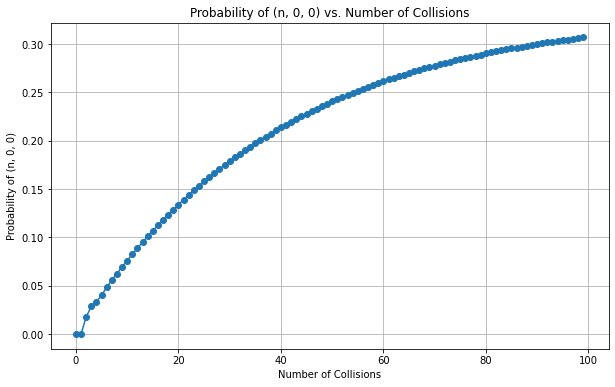

In [8]:
import matplotlib.pyplot as plt

from collections import Counter

def K(x, y, z):
    return max(x - 1, 0), max(y - 1, 0), min(z + 2, n)

def L(x, y, z):
    return min(x + 2, n), max(y - 1, 0), max(z - 1, 0)

def M(x, y, z):
    return max(x - 1, 0), min(y + 2, n), max(z - 1, 0)

def T(x, y, z):
    return x, y, z

def calc_probs(x, y, z):
    probs = Counter()
    
    funcs = [T, K, L, M]
    weights = [(x**2 - x + y**2 - y + z**2 - z), 2*x*y, 2*y*z, 2*x*z]
    
    for i in range(len(funcs)):
        prob = weights[i] / (n * (n-1))
        if prob != 0:
            probs[funcs[i]] = prob
    
    return probs

def update_parts(x, y, z, collision_func):
    return collision_func(x, y, z)

def sim_colls(start_x, start_y, start_z, n_collisions):
    current_probs = Counter({(start_x, start_y, start_z): 1.0})
    
    for _ in range(n_collisions):
        new_probs = Counter()
        for particles, probability in current_probs.items():
            x, y, z = particles
            if x == 0 and y == 0:
                probs = calc_probs(x, y, z)
                new_parts = update_parts(x, y, z, T)
                new_parts = tuple(max(min(val, n), 0) for val in new_parts)
                new_probs[new_parts] += probability
            else:
                probs = calc_probs(x, y, z)
                for func, prob in probs.items():
                    new_parts = update_parts(x, y, z, func)
                    new_parts = tuple(max(min(val, n), 0) for val in new_parts)
                    new_probs[new_parts] += probability * prob
        current_probs =new_probs
    
    return current_probs

def main():
    global n
    x = int(input("Enter the initial number of A particles: "))
    y = int(input("Enter the initial number of B particles: "))
    z = int(input("Enter the initial number of C particles: "))
    n = x + y + z  # Total number of particles
    
    print("Number of collisions\tProbability of (n, 0, 0)")
    print("----------------------------------------------")
    for n_collisions in range(1, 50):
        probs = sim_colls(x, y, z, n_collisions)
        prob_n_0_0 = probs.get((n, 0, 0), 0)
        print(f"{n_collisions}\t\t\t{prob_n_0_0:.5f}")

if __name__ == "__main__":
    main()



def main():
    global n
    x = int(input("Enter the initial number of A particles: "))
    y = int(input("Enter the initial number of B particles: "))
    z = int(input("Enter the initial number of C particles: "))
    n = x + y + z  # Total number of particles
    
    num_collisions = list(range(0, 100))
    prob_n_0_0 = []

    for n_collisions in num_collisions:
        probs = sim_colls(x, y, z, n_collisions)
        prob_n_0_0.append(probs.get((n, 0, 0), 0))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(num_collisions, prob_n_0_0, marker='o', linestyle='-')
    plt.xlabel('Number of Collisions')
    plt.ylabel('Probability of (n, 0, 0)')
    plt.title('Probability of (n, 0, 0) vs. Number of Collisions')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


Enter the initial number of A particles: 2
Enter the initial number of B particles: 2
Enter the initial number of C particles: 2


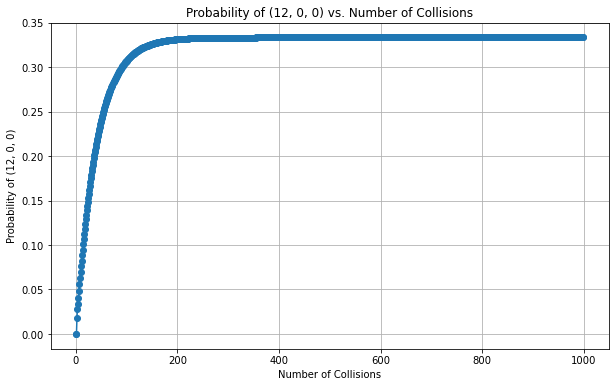

In [9]:
import matplotlib.pyplot as plt

from collections import Counter

def K(x, y, z):
    return max(x - 1, 0), max(y - 1, 0), min(z + 2, n)

def L(x, y, z):
    return min(x + 2, n), max(y - 1, 0), max(z - 1, 0)

def M(x, y, z):
    return max(x - 1, 0), min(y + 2, n), max(z - 1, 0)

def T(x, y, z):
    return x, y, z

def calc_probs(x, y, z):
    probs = Counter()
    
    funcs = [T, K, L, M]
    weights = [(x**2 - x + y**2 - y + z**2 - z), 2*x*y, 2*y*z, 2*x*z]
    
    for i in range(len(funcs)):
        prob = weights[i] / (n * (n-1))
        if prob != 0:
            probs[funcs[i]] = prob
    
    return probs

def update_parts(x, y, z, collision_func):
    return collision_func(x, y, z)

def sim_colls(start_x, start_y, start_z, n_collisions):
    current_probs = Counter({(start_x, start_y, start_z): 1.0})
    
    for _ in range(n_collisions):
        new_probs = Counter()
        for particles, probability in current_probs.items():
            x, y, z = particles
            if x == 0 and y == 0:
                probs = calc_probs(x, y, z)
                new_parts = update_parts(x, y, z, T)
                new_parts = tuple(max(min(val, n), 0) for val in new_parts)
                new_probs[new_parts] += probability
            else:
                probs = calc_probs(x, y, z)
                for func, prob in probs.items():
                    new_parts = update_parts(x, y, z, func)
                    new_parts = tuple(max(min(val, n), 0) for val in new_parts)
                    new_probs[new_parts] += probability * prob
        current_probs = new_probs
    
    return current_probs





def main():
    global n
    x = int(input("Enter the initial number of A particles: "))
    y = int(input("Enter the initial number of B particles: "))
    z = int(input("Enter the initial number of C particles: "))
    n = x + y + z  # Total number of particles
    
    num_collisions = list(range(0, 1000))
    prob_n_0_0 = []

    for n_collisions in num_collisions:
        probs = sim_colls(x, y, z, n_collisions)
        prob_n_0_0.append(probs.get((n, 0, 0), 0))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(num_collisions, prob_n_0_0, marker='o', linestyle='-')
    plt.xlabel('Number of Collisions')
    plt.ylabel('Probability of (12, 0, 0)')
    plt.title('Probability of (12, 0, 0) vs. Number of Collisions')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

In [10]:
from collections import Counter

# Define collision functions
def K(x, y, z):
    return max(x-1, 0), max(y-1, 0), min(z+2, n)

def L(x, y, z):
    return min(x+2, n), max(y-1, 0), max(z-1, 0)

def M(x, y, z):
    return max(x-1, 0), min(y+2, n), max(z-1, 0)

def T(x, y, z):
    return x, y, z

# Function to calculate all possible outcomes after a given number of collisions
def calc_outcomes(x, y, z, num_collisions):
    outcomes = Counter()
    poss_parts = [(x, y, z)]

    # Perform collisions for each particle combination
    for _ in range(num_collisions):
        new_poss_parts = []
        for particles in poss_parts:
            # Apply each collision function to the particle combination
            for collision_func in [T, K, L, M]:
                new_particles = collision_func(*particles)
                # Check if the new particles result in (n, 0, 0)
                if new_particles[1] == 0 and new_particles[2] == 0:
                    outcomes[new_particles] += 1
                else:
                    new_poss_parts.append(new_particles)
        poss_parts = new_poss_parts
    
    return outcomes

# Main function
def main():
    global n
    # Input initial number of particles and number of collisions
    x = int(input("Enter the initial number of A particles: "))
    y = int(input("Enter the initial number of B particles: "))
    z = int(input("Enter the initial number of C particles: "))
    n = x + y + z
    num_collisions = int(input("Enter the number of collisions: "))

    # Calculate outcomes
    outcomes = calc_outcomes(x, y, z, num_collisions)

    # Print the possible combinations of functions that result in (n, 0, 0)
    print("Possible combinations of functions resulting in (n, 0, 0):")
    for particles, count in outcomes.items():
        print(f"Particles: {particles}, Count: {count}")

if __name__ == "__main__":
    main()


Enter the initial number of A particles: 2
Enter the initial number of B particles: 2
Enter the initial number of C particles: 2
Enter the number of collisions: 6
Possible combinations of functions resulting in (n, 0, 0):
Particles: (6, 0, 0), Count: 79
